In [1]:
from additional_test_set import AdditionalTestSet

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from imblearn.ensemble import BalancedRandomForestClassifier

from simple_ml_models import *
from utils import *
from additional_test_set_visualisation import Visualisation
from dimension_reduction import display_umap_2d_plot, display_pca_2d_plot, display_tsne_2d_plot

2023-05-26 17:59:49.489614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_data_path = "data/SingleCell_new_split/newSplitTrainCounts.tsv"
test_data_path = "data/SingleCell_new_split/newSplitTestBCounts.tsv"
train_classes_path = "data/SingleCell_new_split/newSplitTrainSamples.tsv"
test_classes_path = "data/SingleCell_new_split/newSplitTestBSamples.tsv"
SEED = 42

data_object = AdditionalTestSet(
    train_data_path, test_data_path, train_classes_path, test_classes_path
)
data_object.summary()

Total cells number in train data: 176
CTC cells number in train data: 130
WBC cells number in train data: 38
CTC-WBC cells number in test data: 8

Total cells number in test data: 29154
CTC cells number in test data: 1534
WBC cells number in test data: 27620
CTC-WBC cells number in test data: 0


In [3]:
cut_by_mean_train_data, cut_by_mean_test_data = AdditionalTestSet.cut_data_by_mean(
    data_object.train_data, data_object.test_data, threshold=0.3
)
(
    cut_by_mean_max_train_data,
    cut_by_mean_max_test_data,
) = AdditionalTestSet.cut_data_by_max(
    cut_by_mean_train_data, cut_by_mean_test_data, threshold=5
)
print(f"Feature number: {len(cut_by_mean_max_train_data.columns)}")

Feature number: 67


In [4]:
calculate_global_statistics(cut_by_mean_max_train_data, data_object.train_classes)

CTC mean: 1.3878185937553742
WBC mean: 1.5953677170154843
CTC standard deviation: 1.4652900397345212
WBC standard deviation: 1.6676982620698146
CTC non-zero values: 70.62513519359723 %
WBC non-zero values: 69.87431264728987 %
T-test p-values: 0.00022222264604727357


/home/melehean/miniconda3/envs/gumed/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


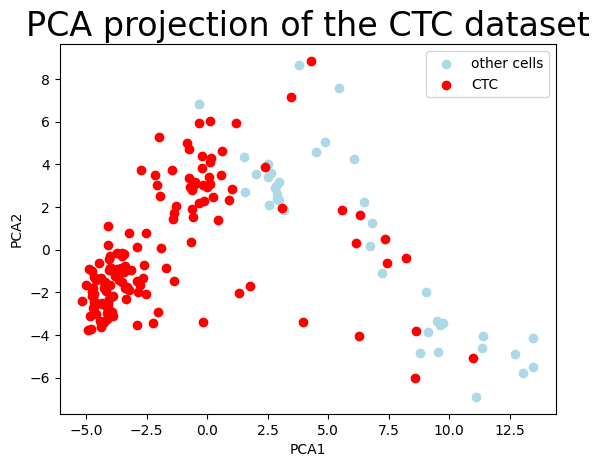

In [5]:
display_pca_2d_plot(cut_by_mean_max_train_data, data_object.train_classes, 42)

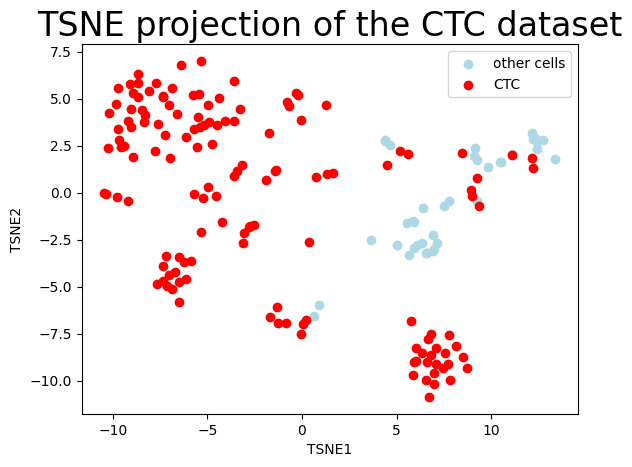

In [6]:
display_tsne_2d_plot(cut_by_mean_max_train_data, data_object.train_classes, 42)

In [7]:
cut_by_mean_with_classes_train_data, cut_by_mean_with_classes_test_data = data_object.cut_data_by_mean_with_classes(
    data_object.train_data, data_object.test_data, threshold=1.6
)
print(f"Feature number: {len(cut_by_mean_with_classes_train_data.columns)}")

Feature number: 67


In [8]:
calculate_global_statistics(cut_by_mean_with_classes_train_data, data_object.train_classes)

CTC mean: 2.183716460783793
WBC mean: 2.3405462298330475
CTC standard deviation: 1.0421085708740032
WBC standard deviation: 1.1590088328941146
CTC non-zero values: 95.18710793856803 %
WBC non-zero values: 94.10840534171248 %
T-test p-values: 3.004350923767403e-16


/home/melehean/miniconda3/envs/gumed/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


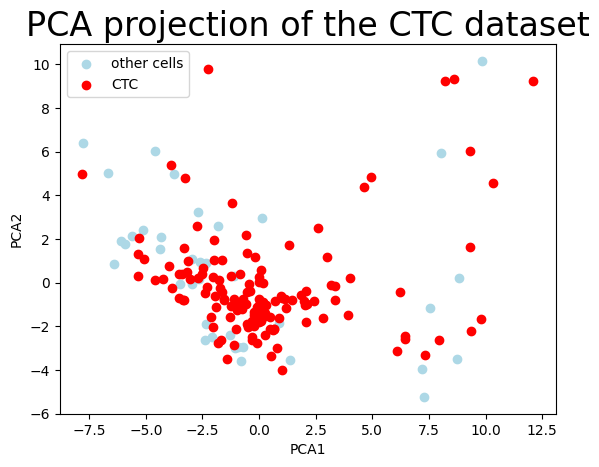

In [9]:
display_pca_2d_plot(cut_by_mean_with_classes_train_data, data_object.train_classes, 42)

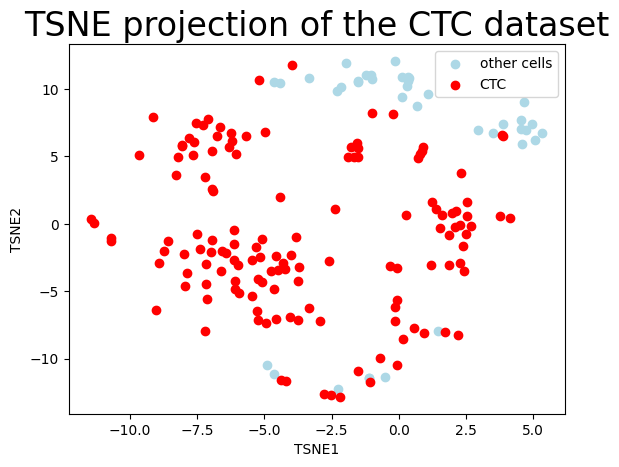

In [10]:
display_tsne_2d_plot(cut_by_mean_with_classes_train_data, data_object.train_classes, 42)

In [11]:
biological_features = pd.read_csv("features/macrophages_vs_others_gbm_emt_v2_2023-05-17.tsv", sep=",")
biological_features = np.array(biological_features["Symbol"])
cut_by_mean_with_classes_features = np.array(cut_by_mean_with_classes_train_data.columns)
cut_by_mean_max_features = np.array(cut_by_mean_max_train_data.columns)
cut_by_mean_with_classes_common_features = np.intersect1d(biological_features, cut_by_mean_with_classes_features)
cut_by_mean_max_common_features = np.intersect1d(biological_features, cut_by_mean_max_features)

print(f"Common features for cut by mean with classes: {cut_by_mean_with_classes_common_features}")
print(f"Common features for cut by mean and max: {cut_by_mean_max_common_features}")

Common features for cut by mean with classes: []
Common features for cut by mean and max: []


### Biological features

In [12]:
biological_features = np.unique(np.intersect1d(biological_features, data_object.train_data.columns))
biological_features_train_data = data_object.train_data[biological_features]
biological_features_test_data = data_object.test_data[biological_features]

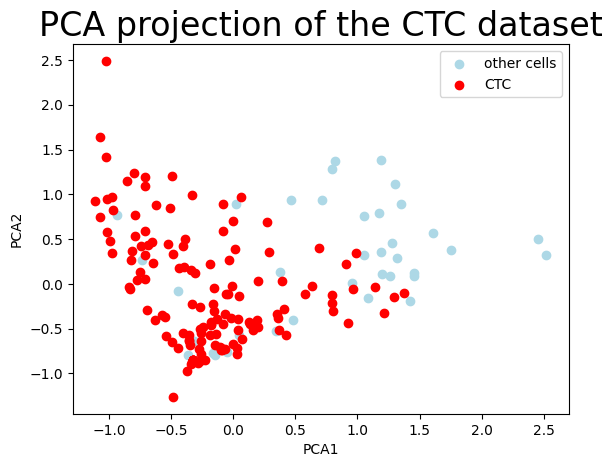

In [13]:
display_pca_2d_plot(biological_features_train_data, data_object.train_classes, 42)

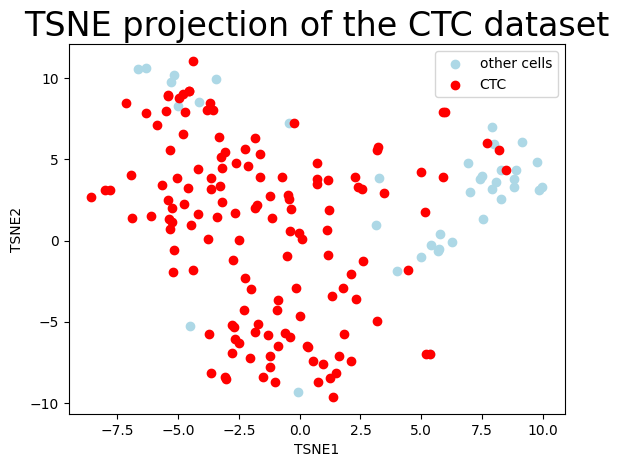

In [14]:
display_tsne_2d_plot(biological_features_train_data, data_object.train_classes, 42)

### Cut by mean max and biological

In [15]:
cut_by_mean_max_features_merged = np.unique(np.concatenate((cut_by_mean_max_features, biological_features)))
cut_by_mean_max_merged_train_data = data_object.train_data[cut_by_mean_max_features_merged]
cut_by_mean_max_merged_test_data = data_object.test_data[cut_by_mean_max_features_merged]

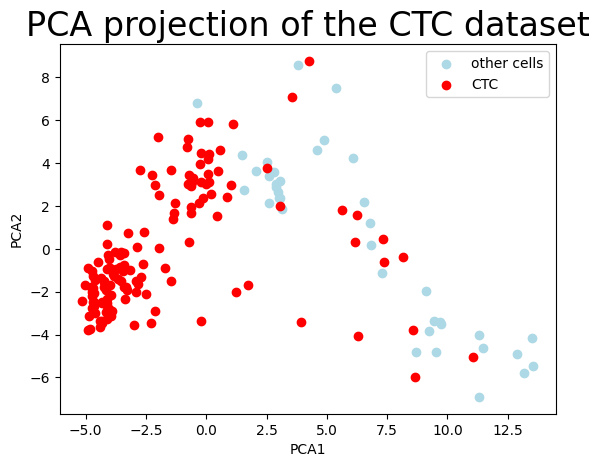

In [16]:
display_pca_2d_plot(cut_by_mean_max_merged_train_data, data_object.train_classes, 42)

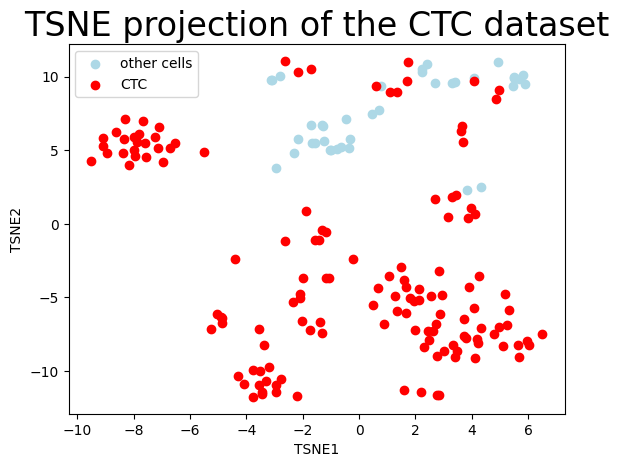

In [17]:
display_tsne_2d_plot(cut_by_mean_max_merged_train_data, data_object.train_classes, 42)

### Cut by mean with classes and biological

In [18]:
cut_by_mean_with_classes_features_merged = np.concatenate((cut_by_mean_with_classes_features, biological_features))
cut_by_mean_with_classes_merged_train_data = data_object.train_data[cut_by_mean_with_classes_features_merged]
cut_by_mean_with_classes_merged_test_data = data_object.test_data[cut_by_mean_with_classes_features_merged]

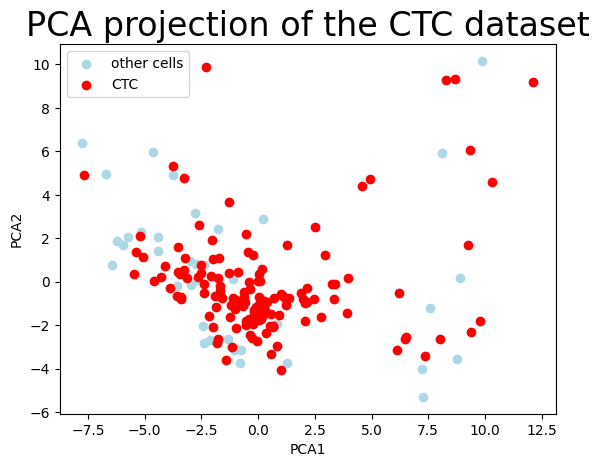

In [19]:
display_pca_2d_plot(cut_by_mean_with_classes_merged_train_data, data_object.train_classes, 42)

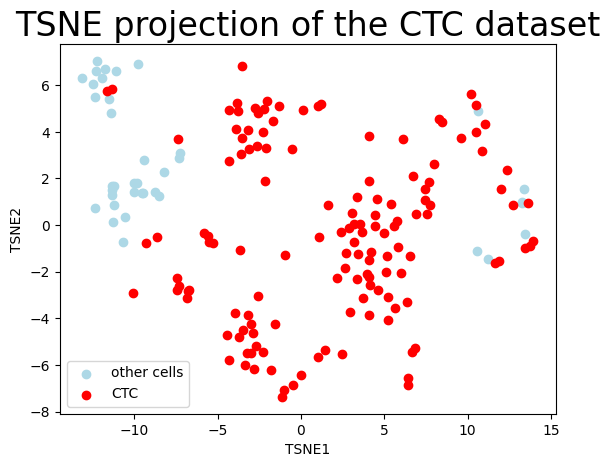

In [20]:
display_tsne_2d_plot(cut_by_mean_with_classes_merged_train_data, data_object.train_classes, 42)

### LightGBM

In [21]:
lgbm_clf = LGBMClassifier(
    boosting_type="gbdt",
    min_child_weight=0.01,
    max_depth=10,
    num_leaves=16,
    n_estimators=2000,
    subsample_for_bin=10000,
    is_unbalance=True,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [22]:
lgbm_model_object = Model(
    lgbm_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()


Validation balanced accuracy 0.8011426978818283
Training balanced accuracy 0.9866666666666667

Validation roc auc 0.9338303604607953
Training roc auc 0.9991304347826087

Validation precision 0.9109105180533753
Training precision 0.992831541218638

Validation recall 0.9420289855072465
Training recall 1.0

Validation f1 0.924384011977997
Training f1 0.9963963963963964



In [23]:
lgbm_model_object.display_test_results()


Test balanced accuracy 0.6103375779381254

Test roc auc 0.6153750211238951

Test precision 0.07508918014519485

Test recall 0.7559756627553238

Test f1 score 0.1364083328717907


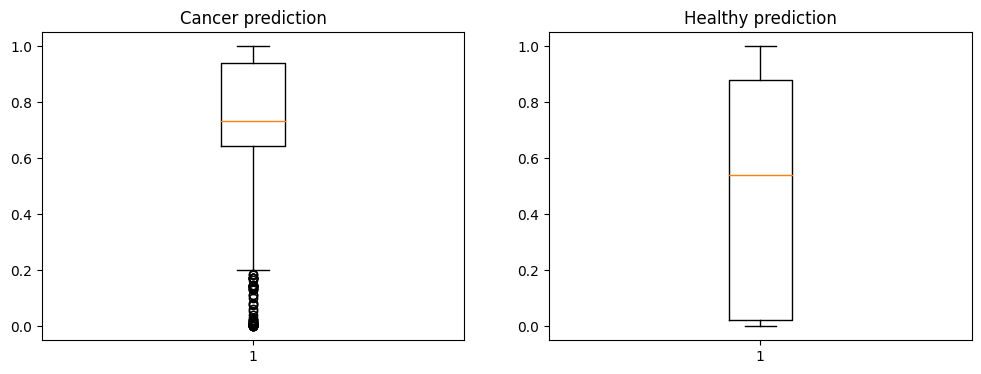

In [24]:
vis = Visualisation(lgbm_estimators, biological_features_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

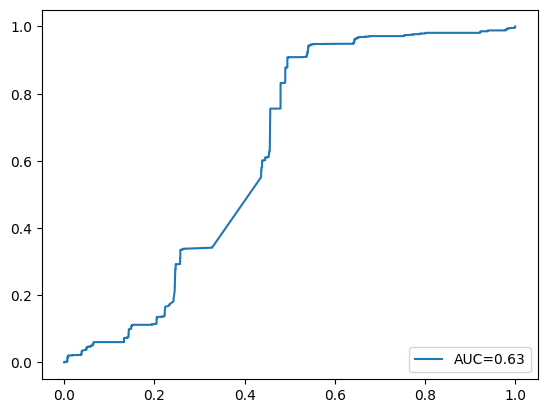

In [25]:
vis.draw_roc_curve_from_probabilities()

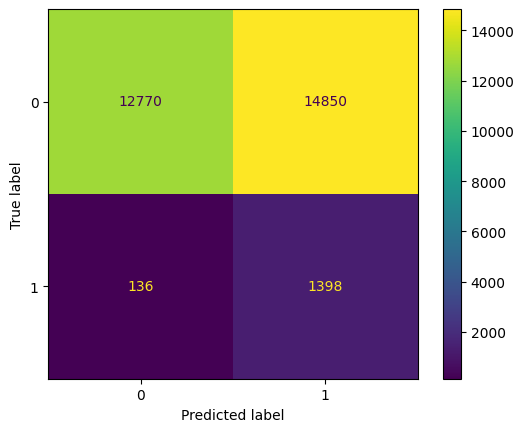

In [26]:
vis.display_confusion_matrix()

In [27]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,1055.666667
MYCBP2,616.000000
MYCBP,175.000000
TWISTNB,169.000000
MYC,110.000000
ZEB1,92.666667
IL3RA,67.333333
ZEB2-AS1,41.666667
MYCBP2-AS1,12.666667


### Cut by mean max and biological

In [28]:
lgbm_model_object = Model(
    lgbm_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()

Validation balanced accuracy 0.9094667409884801
Training balanced accuracy 1.0

Validation roc auc 0.9784002229654404
Training roc auc 1.0

Validation precision 0.9642641411744401
Training precision 1.0

Validation recall 0.9492753623188407
Training recall 1.0

Validation f1 0.9559322776354119
Training f1 1.0



In [29]:
lgbm_model_object.display_test_results()


Test balanced accuracy 0.828543055454591

Test roc auc 0.9701228820639957

Test precision 0.27767812182471935

Test recall 0.9647979139504562

Test f1 score 0.3811528756318389


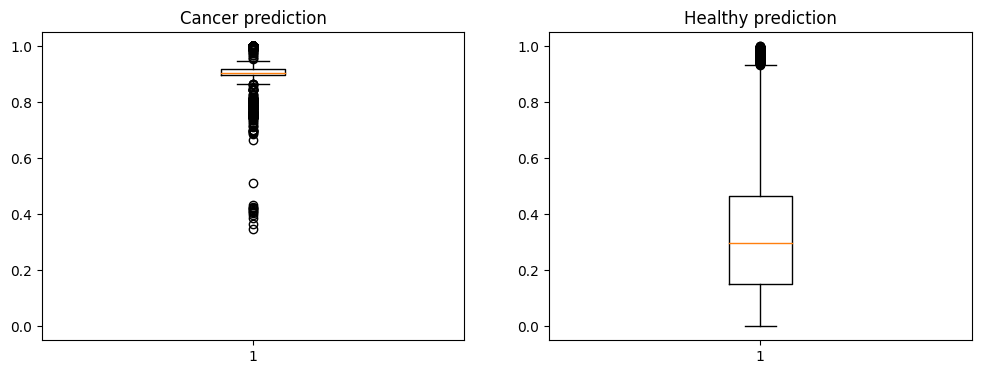

In [30]:
vis = Visualisation(lgbm_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

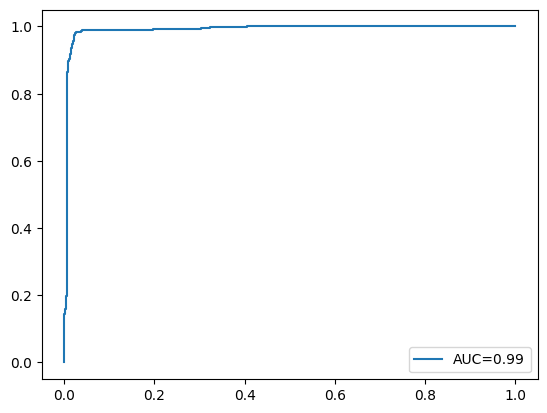

In [31]:
vis.draw_roc_curve_from_probabilities()

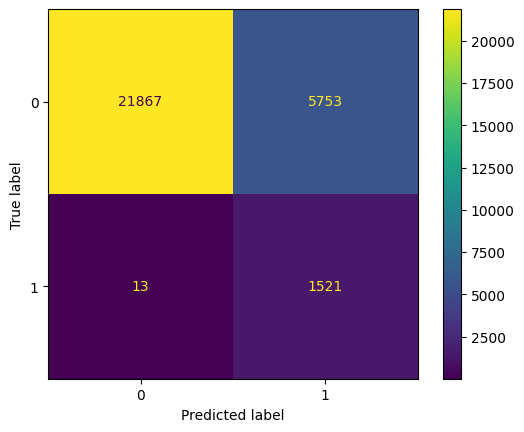

In [32]:
vis.display_confusion_matrix()

In [33]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
HLA-E,68.333333
ACTG1,41.000000
SPINT2,34.666667
KRT19,34.333333
ZEB2,33.333333
...,...
WSB1,1.000000
MYCBP2-AS1,0.666667
MGP,0.666667
PF4,0.333333


### Cut by mean with classes and biological

In [34]:
lgbm_model_object = Model(
    lgbm_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()

Validation balanced accuracy 0.9159234485321441
Training balanced accuracy 1.0

Validation roc auc 0.9790505388331475
Training roc auc 1.0

Validation precision 0.9772727272727272
Training precision 1.0

Validation recall 0.9130434782608696
Training recall 1.0

Validation f1 0.9438058748403576
Training f1 1.0



In [35]:
lgbm_model_object.display_test_results()

Test balanced accuracy 0.8328141024854289

Test roc auc 0.9805285521108003

Test precision 0.24805232394783847

Test recall 0.9980443285528032

Test f1 score 0.3663750971571591


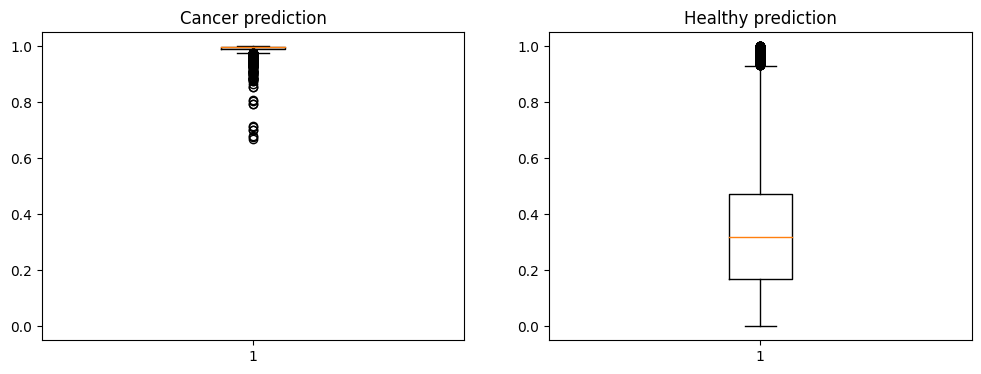

In [36]:
vis = Visualisation(lgbm_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

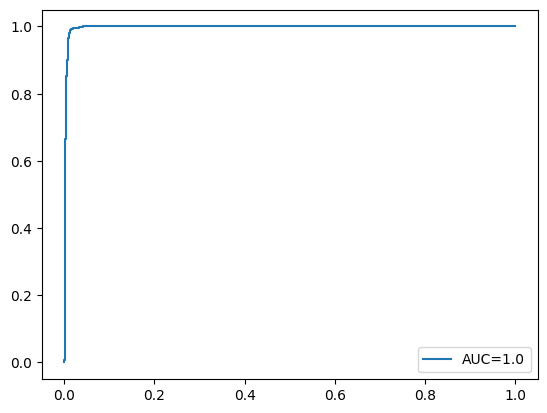

In [37]:
vis.draw_roc_curve_from_probabilities()

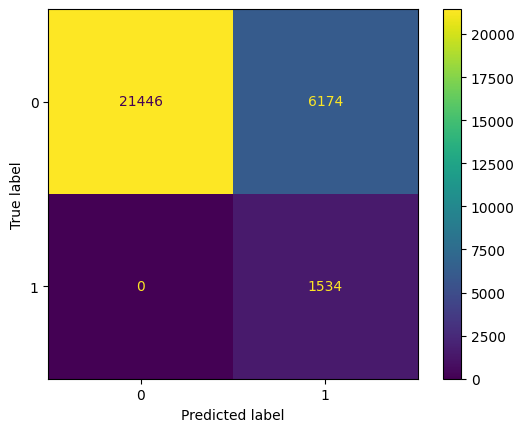

In [38]:
vis.display_confusion_matrix()

In [39]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ACTG1,91.666667
FTL,74.000000
TPT1,47.666667
ZEB2,47.000000
B2M,34.666667
...,...
MYC,1.333333
TMSB10,1.000000
RPL4,1.000000
RPL30,0.666667


### XGBoost

In [40]:
healthy_cells_train_indices = np.where(data_object.train_classes == 0)[0]
cancer_cells_train_indices = np.where(data_object.train_classes == 1)[0]

class_weight = len(healthy_cells_train_indices) / len(cancer_cells_train_indices)

xgb_clf = XGBClassifier(
    booster="gbtree",
    eta=0.2,
    # min_child_weight=48,  # Jedyna zmiana w porownaniu do poprzedniego podzialu
    max_depth=8,
    gamma=0.01,   
    scale_pos_weight=class_weight,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [41]:
xgboost_model_object = Model(
    xgb_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.8317539947974731
Training balanced accuracy 0.9679710144927537

Validation roc auc 0.935084541062802
Training roc auc 0.9959698996655518

Validation precision 0.9338661000246367
Training precision 0.9962962962962963

Validation recall 0.8985507246376812
Training recall 0.9492753623188405

Validation f1 0.9149262248308468
Training f1 0.9718681318681318



In [42]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.6381700995159677

Test roc auc 0.6645904670733155

Test precision 0.08050852716339642

Test recall 0.7312038244241634

Test f1 score 0.14407469908705478


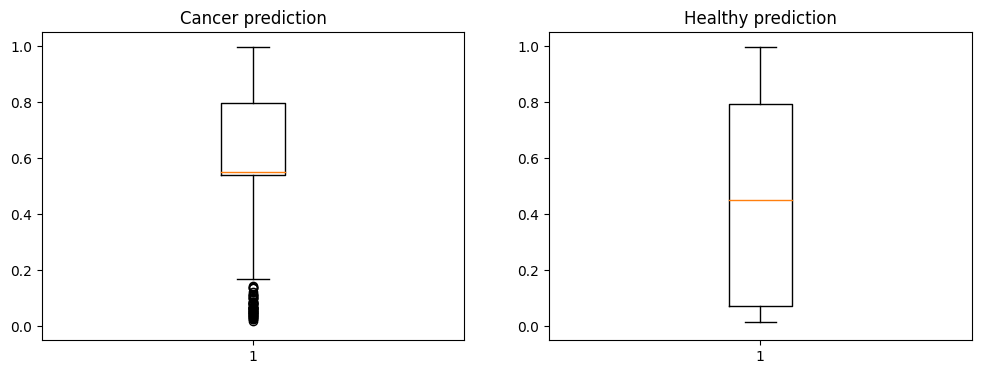

In [43]:
vis = Visualisation(xgboost_estimators, biological_features_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

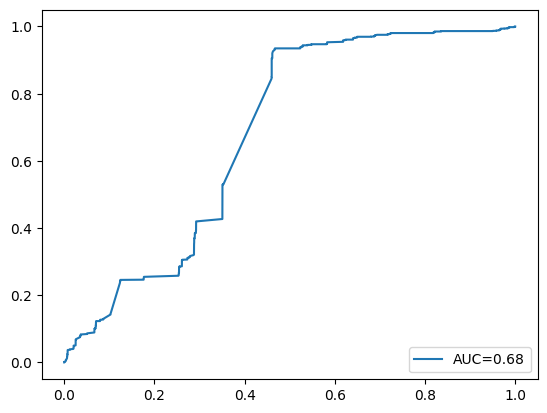

In [44]:
vis.draw_roc_curve_from_probabilities()

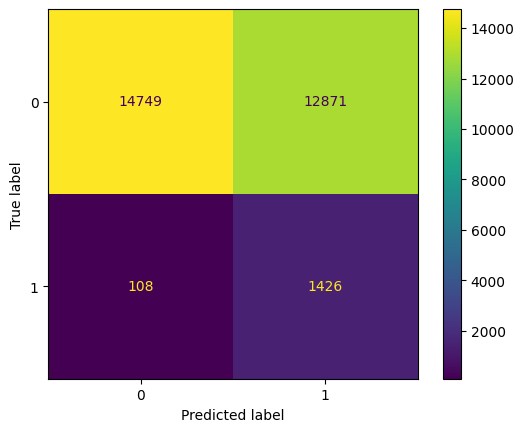

In [45]:
vis.display_confusion_matrix()

In [46]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,0.398434
SNAI3,0.120161
MYCBP,0.099058
TWISTNB,0.080055
MYCBP2-AS1,0.071051
ZEB1,0.062607
ZEB2-AS1,0.061439
IL3RA,0.048887
MYCBP2,0.044659
MYC,0.013648


### Cut by mean max and biological

In [47]:
xgboost_model_object = Model(
    xgb_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.8821534745447789
Training balanced accuracy 0.9909420289855072

Validation roc auc 0.9722918989223337
Training roc auc 1.0

Validation precision 0.9560185185185186
Training precision 1.0

Validation recall 0.9202898550724639
Training recall 0.9818840579710145

Validation f1 0.9364928325838765
Training f1 0.9908321508720023



In [48]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.7838462230790316

Test roc auc 0.9781936969129376

Test precision 0.40133858955569046

Test recall 0.7081703607127338

Test f1 score 0.30660147103931


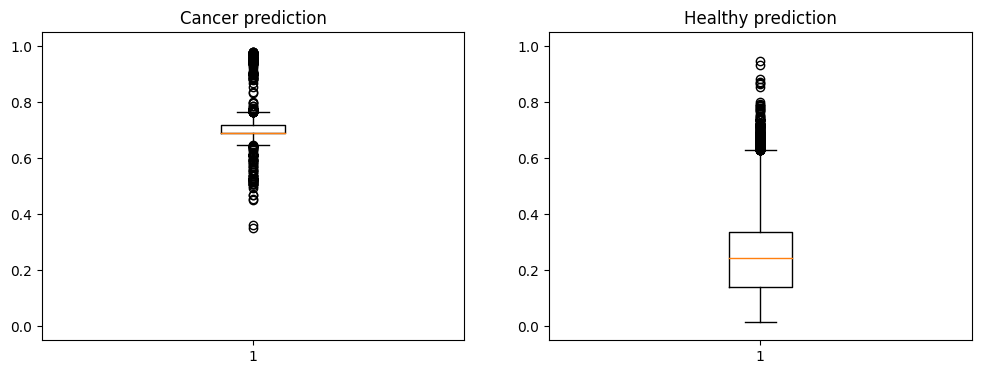

In [49]:
vis = Visualisation(xgboost_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

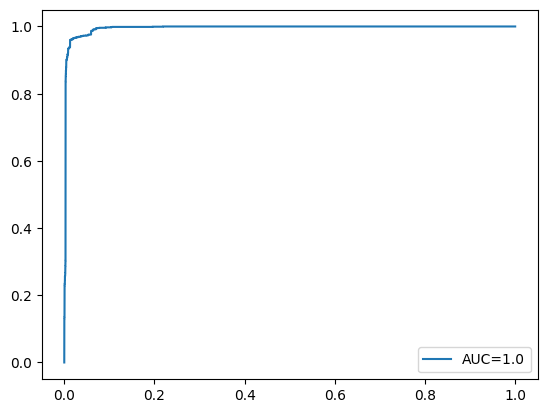

In [50]:
vis.draw_roc_curve_from_probabilities()

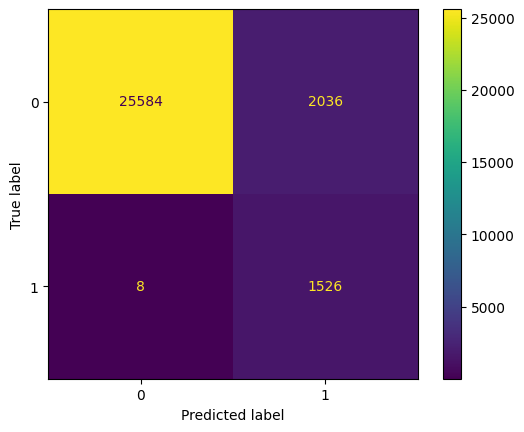

In [51]:
vis.display_confusion_matrix()

In [52]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
KRT19,0.455793
HLA-E,0.155766
LMNA,0.122906
NFKBIA,0.030616
ZEB2,0.029531
CCL4,0.027310
TLN1,0.025727
ACTG1,0.023738
SPINT2,0.019113
PTK2,0.016474


### Cut by mean with classes and biological

In [53]:
xgboost_model_object = Model(
    xgb_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.8902824228911186
Training balanced accuracy 1.0

Validation roc auc 0.9704338535860275
Training roc auc 1.0

Validation precision 0.9631093544137023
Training precision 1.0

Validation recall 0.9130434782608696
Training recall 1.0

Validation f1 0.9368815592203897
Training f1 1.0



In [54]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.8733991234488295

Test roc auc 0.9848385701711405

Test precision 0.3008972306967868

Test recall 0.9876140808344198

Test f1 score 0.41903777927023


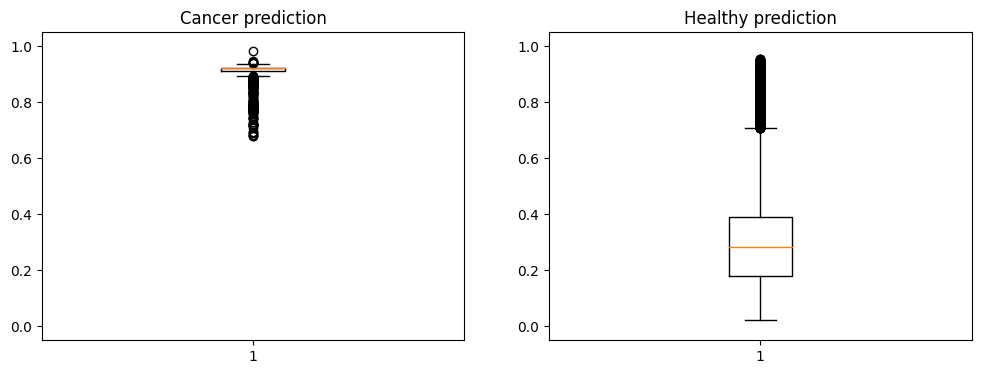

In [55]:
vis = Visualisation(xgboost_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

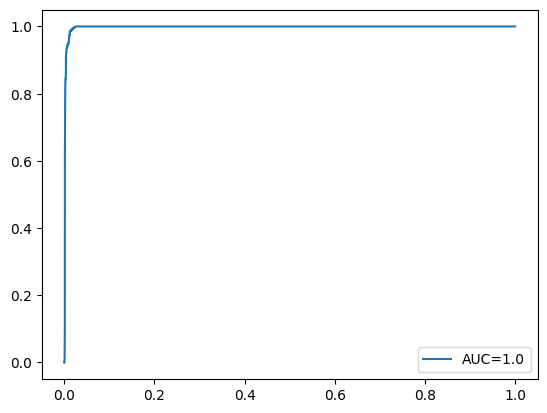

In [56]:
vis.draw_roc_curve_from_probabilities()

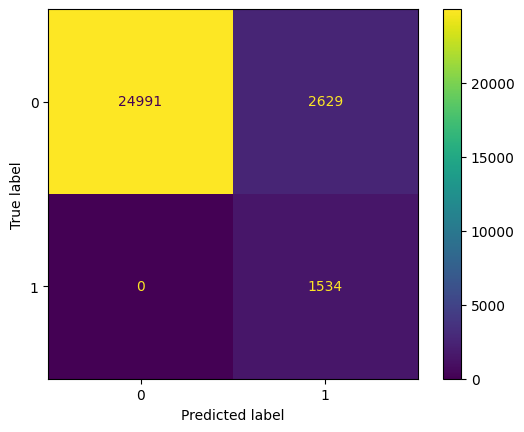

In [57]:
vis.display_confusion_matrix()

In [58]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
FTL,0.206401
ACTG1,0.143253
ZEB2,0.060616
HNRNPA2B1,0.060469
TMSB4X,0.047813
MYL6,0.042512
HLA-C,0.041522
B2M,0.035580
PFN1,0.035410
TPT1,0.033164


### Random Forest

In [59]:
rf_clf = RandomForestClassifier(  
    criterion="log_loss",
    n_estimators=2000,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [60]:
rf_model_object = Model(
    rf_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.8237643998513563
Training balanced accuracy 1.0

Validation roc auc 0.9071441843180974
Training roc auc 1.0

Validation precision 0.9172729961549838
Training precision 1.0

Validation recall 0.9637681159420289
Training recall 1.0

Validation f1 0.9396548436308162
Training f1 1.0



In [61]:
rf_model_object.display_test_results()

Test balanced accuracy 0.682508887770673

Test roc auc 0.6867102652846526

Test precision 0.08442398317979898

Test recall 0.9322033898305085

Test f1 score 0.15472549046827686


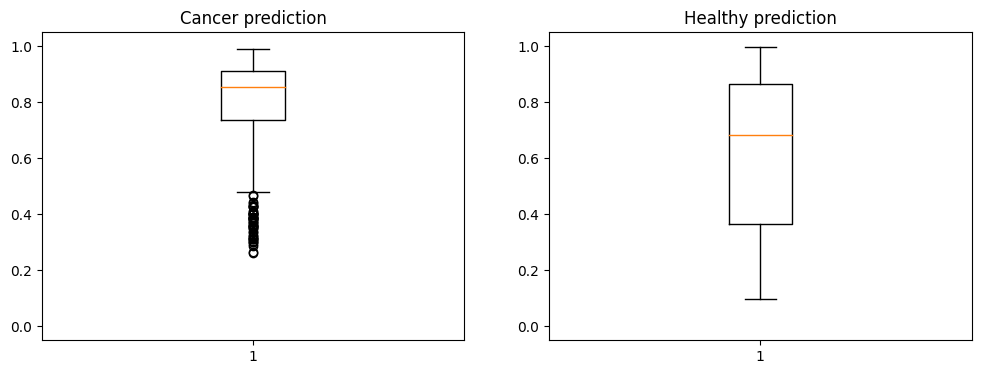

In [62]:
vis = Visualisation(rf_estimators, biological_features_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

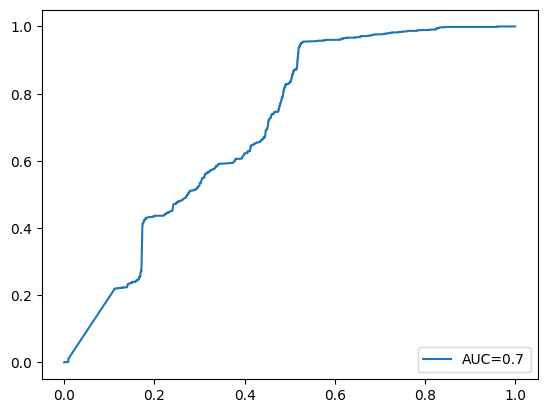

In [63]:
vis.draw_roc_curve_from_probabilities()

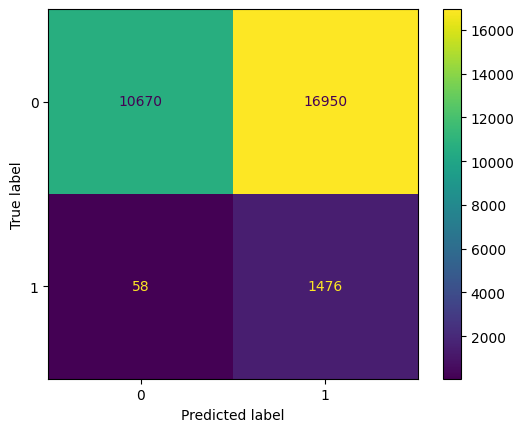

In [64]:
vis.display_confusion_matrix()

In [65]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,0.233115
MYCBP2,0.128173
TWISTNB,0.098367
ZEB2-AS1,0.095130
MYCBP,0.091133
ZEB1,0.064726
SNAI3,0.054726
IL3RA,0.052537
MYCBP2-AS1,0.047875
MYC,0.041492


### Cut by mean max and biological

In [66]:
rf_model_object = Model(
    rf_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.8936269044964696
Training balanced accuracy 1.0

Validation roc auc 0.9881549609810479
Training roc auc 1.0

Validation precision 0.9515731785944553
Training precision 1.0

Validation recall 0.9710144927536232
Training recall 1.0

Validation f1 0.9605436081242534
Training f1 1.0



In [67]:
rf_model_object.display_test_results()

Test balanced accuracy 0.7648986241853729

Test roc auc 0.9989144206105017

Test precision 0.1489230898033684

Test recall 1.0

Test f1 score 0.24766794033549824


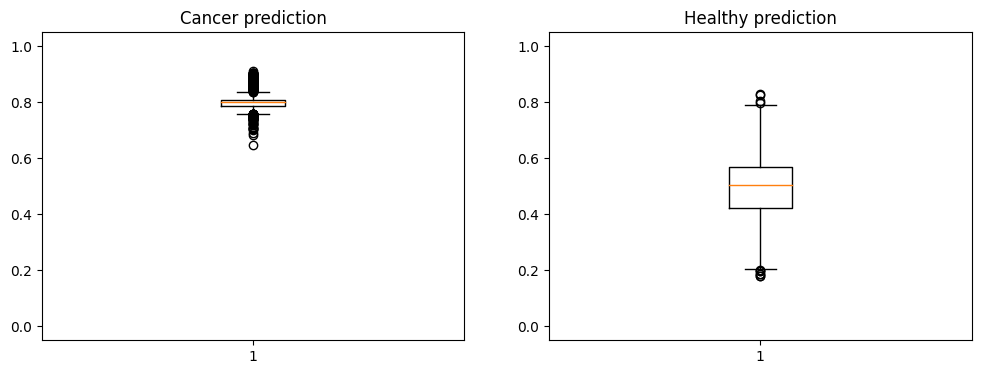

In [68]:
vis = Visualisation(rf_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

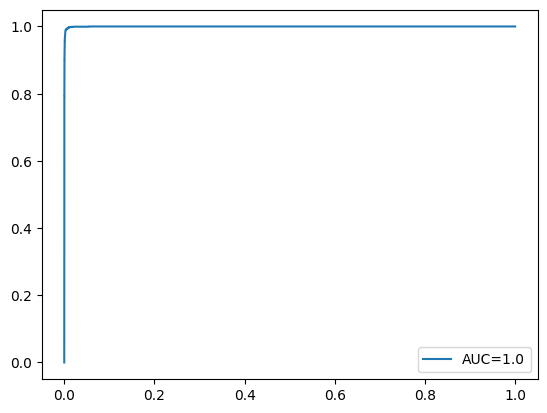

In [69]:
vis.draw_roc_curve_from_probabilities()

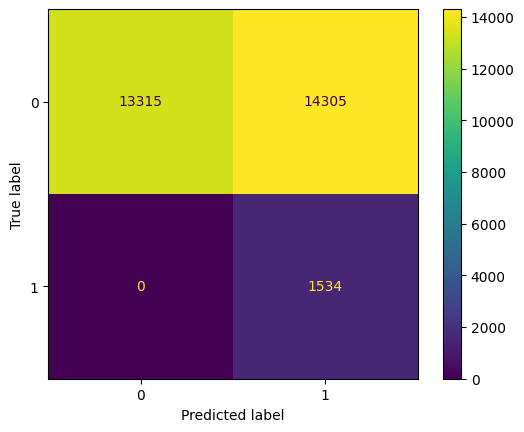

In [70]:
vis.display_confusion_matrix()

In [71]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
KRT19,0.100082
HLA-E,0.078880
LMNA,0.068297
CCL4,0.049267
CD74,0.043360
...,...
TWIST1,0.000386
SNAI3-AS1,0.000315
SNAI1,0.000310
MYCBPAP,0.000113


### Cut by mean with classes and biological

In [72]:
rf_model_object = Model(
    rf_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.8906075808249722
Training balanced accuracy 1.0

Validation roc auc 0.9822556670382757
Training roc auc 1.0

Validation precision 0.9448696145124718
Training precision 1.0

Validation recall 0.9927536231884058
Training recall 1.0

Validation f1 0.9681970884658454
Training f1 1.0



In [73]:
rf_model_object.display_test_results()

Test balanced accuracy 0.748123340574463

Test roc auc 0.9925020282086213

Test precision 0.10807643609698593

Test recall 1.0

Test f1 score 0.19390786756044165


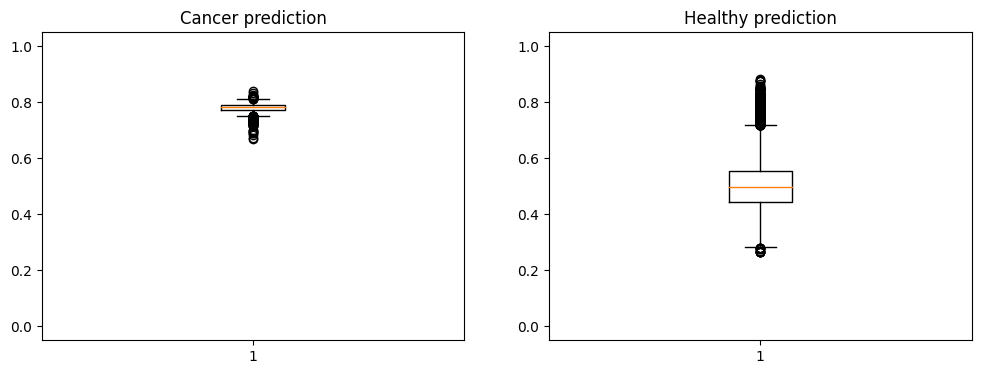

In [74]:
vis = Visualisation(rf_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

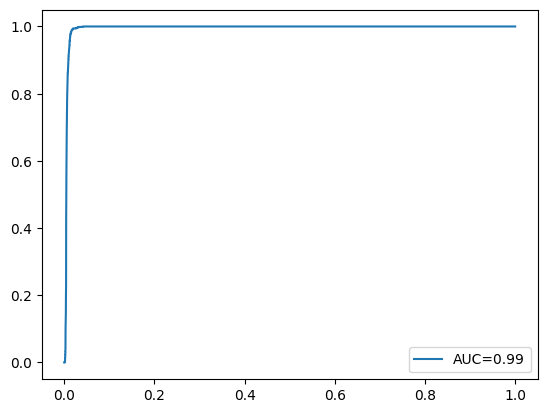

In [75]:
vis.draw_roc_curve_from_probabilities()

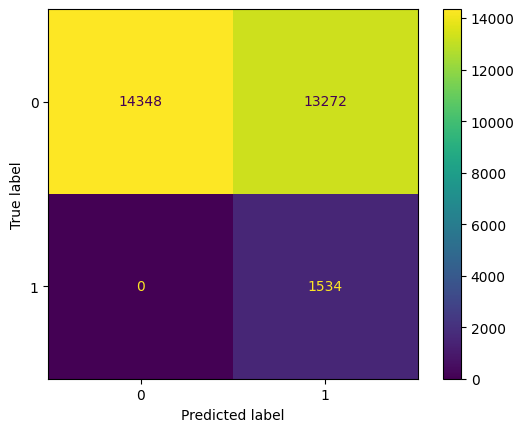

In [76]:
vis.display_confusion_matrix()

In [77]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
FTL,0.068601
ACTG1,0.067253
ZEB2,0.060423
B2M,0.056524
TPT1,0.054490
...,...
TWIST1,0.000406
SNAI3-AS1,0.000349
SNAI2,0.000209
MYCBPAP,0.000164


### Balanced Random Forest

In [78]:
brf_clf = BalancedRandomForestClassifier(
    n_estimators=2000,
    class_weight="balanced",
    criterion="entropy",
    oob_score=True,  
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [79]:
brf_model_object = Model(
    brf_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.8331010776662949
Training balanced accuracy 0.9583333333333334

Validation roc auc 0.923076923076923
Training roc auc 0.9995707915273133

Validation precision 0.9457766066461719
Training precision 1.0

Validation recall 0.8478260869565218
Training recall 0.9166666666666666

Validation f1 0.8892490741692723
Training f1 0.9565142954973463



In [80]:
brf_model_object.display_test_results()

Test balanced accuracy 0.6449523725005751

Test roc auc 0.6712562164043527

Test precision 0.0897971746303237

Test recall 0.7294654498044327

Test f1 score 0.15858592468906374


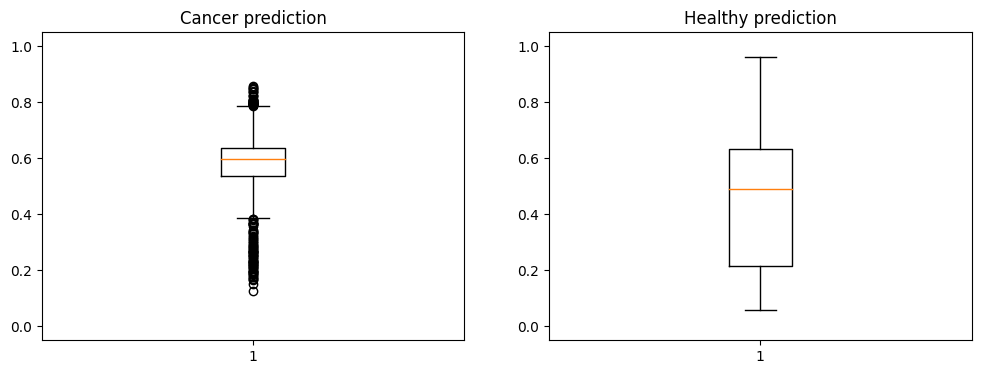

In [81]:
vis = Visualisation(brf_estimators, biological_features_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

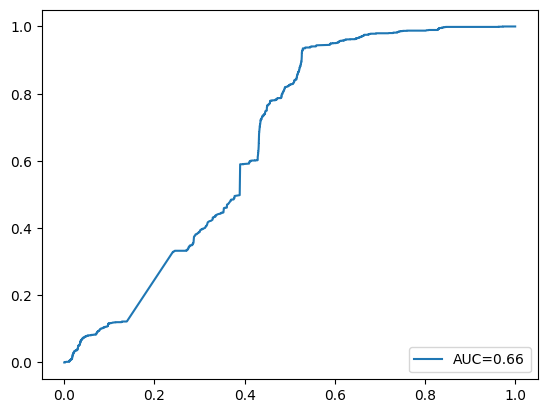

In [82]:
vis.draw_roc_curve_from_probabilities()

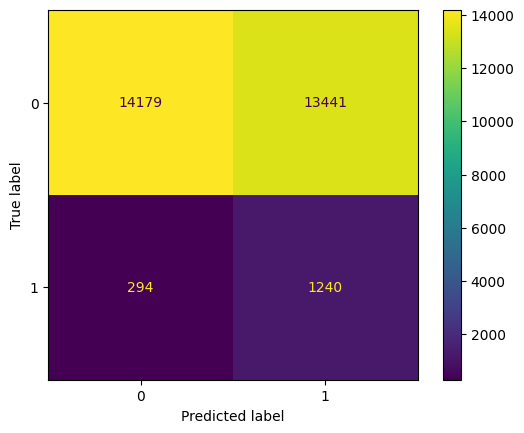

In [83]:
vis.display_confusion_matrix()

In [84]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,0.225566
MYCBP2,0.126004
MYCBP,0.124728
TWISTNB,0.117711
ZEB2-AS1,0.071922
ZEB1,0.060666
MYC,0.051976
IL3RA,0.044565
MYCBP2-AS1,0.035027
SNAI3,0.032318


### Cut by mean max and biological 

In [85]:
brf_model_object = Model(
    brf_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.9437012263099219
Training balanced accuracy 0.9728260869565218

Validation roc auc 0.9883872166480862
Training roc auc 1.0

Validation precision 0.9925925925925926
Training precision 1.0

Validation recall 0.9130434782608695
Training recall 0.9456521739130436

Validation f1 0.9503240535626523
Training f1 0.9720456505717946



In [86]:
brf_model_object.display_test_results()

Test balanced accuracy 0.9916115399878086

Test roc auc 0.9995210737012306

Test precision 0.8545284634859894

Test recall 0.9943502824858758

Test f1 score 0.9133467411540872


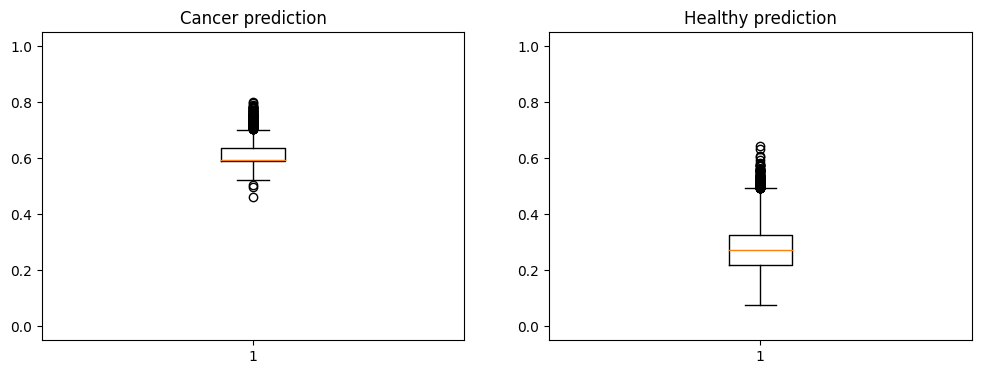

In [87]:
vis = Visualisation(brf_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

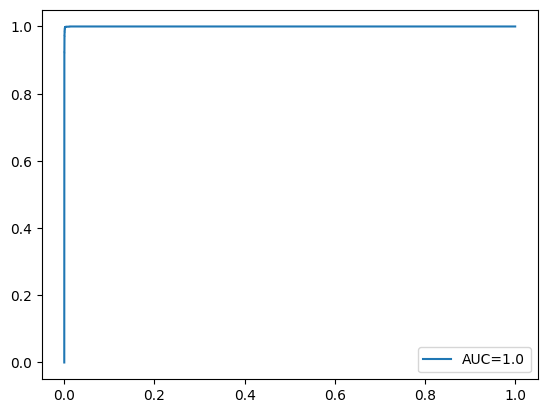

In [88]:
vis.draw_roc_curve_from_probabilities()

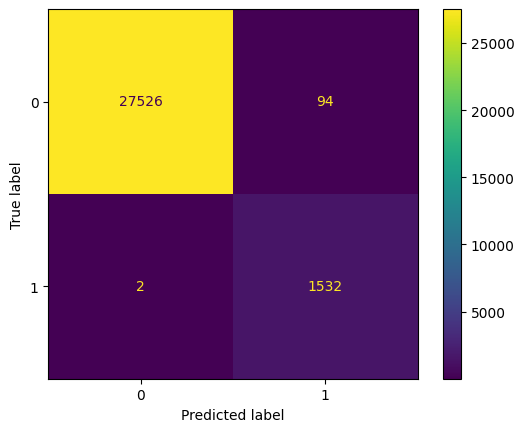

In [89]:
vis.display_confusion_matrix()

In [90]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
KRT19,0.110508
HLA-E,0.071287
LMNA,0.058700
ACTG1,0.055158
FTL,0.052949
...,...
ZEB1-AS1,0.000319
SNAI2,0.000306
SNAI3-AS1,0.000258
MYCBPAP,0.000235


### Cut by mean with classes and biological

In [91]:
brf_model_object = Model(
    brf_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.9298123374210331
Training balanced accuracy 0.9855072463768115

Validation roc auc 0.9863898179115571
Training roc auc 1.0

Validation precision 0.9846723044397464
Training precision 1.0

Validation recall 0.9130434782608696
Training recall 0.9710144927536231

Validation f1 0.9473015053022803
Training f1 0.9852462370893672



In [92]:
brf_model_object.display_test_results()

Test balanced accuracy 0.9898139555229113

Test roc auc 0.9989141531198381

Test precision 0.7477453617609346

Test recall 0.9986962190352021

Test f1 score 0.854133960436351


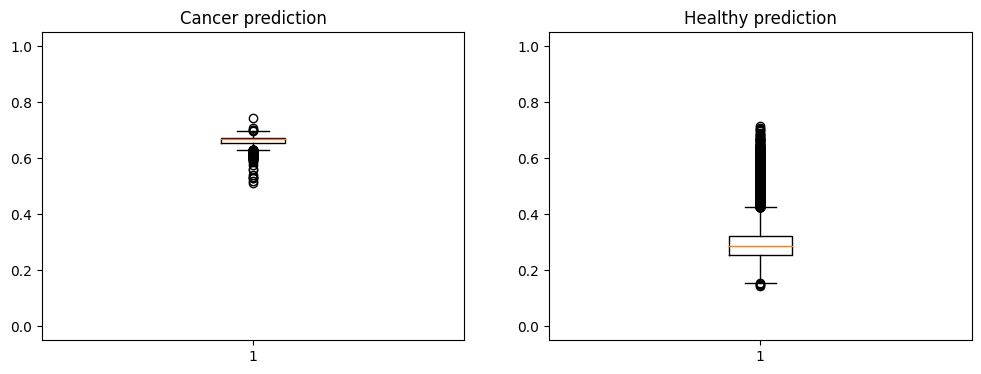

In [93]:
vis = Visualisation(brf_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

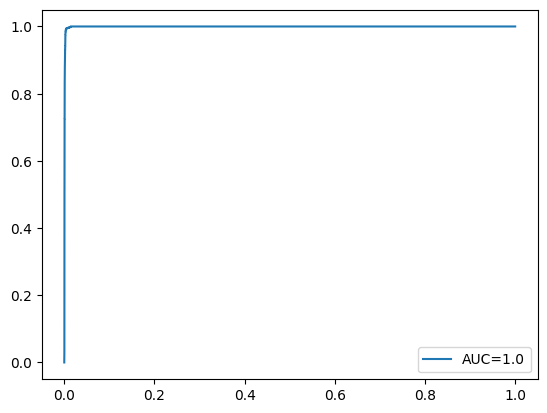

In [94]:
vis.draw_roc_curve_from_probabilities()

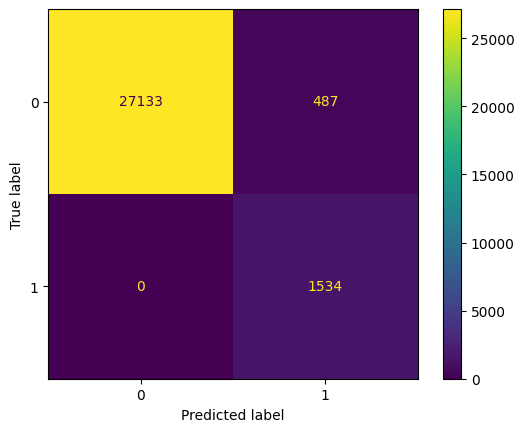

In [95]:
vis.display_confusion_matrix()

In [96]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
FTL,0.094187
ACTG1,0.087135
TMSB4X,0.054912
HLA-C,0.052423
B2M,0.046922
...,...
ZEB1-AS1,0.000741
SNAI3-AS1,0.000563
MYCBPAP,0.000476
SNAI2,0.000356
